##**Entendimento dos Dados**

###**Bibliotecas**

In [179]:
"""
Importações de bibliotecas comumente usadas em análise de dados e visualização.

Este bloco de importações inclui as seguintes bibliotecas:
- requests: para fazer solicitações HTTP.
- pandas: para manipulação e análise de dados em formato tabular.
- StringIO da io: para manipulação de strings como arquivos.


Referência:
    Documentação oficial das bibliotecas individuais para mais detalhes sobre suas funcionalidades e uso.
"""

import requests
import pandas as pd
from io import StringIO
import io


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

###**Extração e leitura dos dados**

In [180]:
"""
Carrega um arquivo Excel contendo dados demográficos do Censo IBGE 2022, das unidades federativas do Brasil, realizando algumas
operações de limpeza e formatação nos dados para exibição do DataFrame resultante.

Fonte oficial: IBGE (https://sidra.ibge.gov.br/Tabela/9606#)

Repositório utilizado para armazenamento desses dados - GitHub (https://github.com/tiagotff/teste_ada/raw/main/Tabela%209606.xlsx)

"""

#Realizando a extração dos dados desejados do GitHub
file_url = "https://github.com/tiagotff/teste_ada/raw/main/Tabela%209606.xlsx"
df = pd.read_excel(file_url)
df = df.iloc[5:]
display(df.tail(30))

,"Tabela 9606 - População residente, por cor ou raça, segundo o sexo e a idade",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
570,NaN,70 a 74 anos,173459,80586,92873,78824,35448,43376,15100,7538,7562,563,294,269,78627,37152,41475,341,151,190
571,NaN,75 a 79 anos,111463,51274,60189,53285,23607,29678,9510,4715,4795,395,183,212,48057,22686,25371,215,83,132
572,NaN,80 a 84 anos,70254,31307,38947,35125,14807,20318,6060,2963,3097,222,113,109,28739,13390,15349,106,34,72
573,NaN,85 a 89 anos,34864,14745,20119,18007,7111,10896,2899,1400,1499,113,52,61,13787,6157,7630,56,24,32
574,NaN,90 a 94 anos,14065,5541,8524,7335,2621,4714,1170,556,614,53,17,36,5485,2337,3148,22,10,12
575,NaN,95 a 99 anos,3713,1434,2279,1878,687,1191,358,152,206,18,5,13,1451,588,863,8,2,6
576,NaN,100 anos ou mais,903,322,581,372,120,252,130,54,76,1,-,1,396,146,250,4,2,2
577,Distrito Federal,Total,2817381,1342786,1474595,1126334,517199,609135,301765,155182,146583,12810,5949,6861,1370836,661854,708982,5536,2552,2984
578,NaN,0 a 4 anos,166848,84606,82242,76410,38723,37687,10247,5253,4994,533,274,259,79442,40251,39191,211,103,108
579,NaN,5 a 9 anos,184611,94159,90452,75223,38655,36568,13810,6906,6904,587,304,283,94721,48148,46573,262,142,120


Aqui observamos que alguns tratamentos iniciais serão necessários. Inicialmente, é preciso:
1. Renomear o nome das colunas;
2. Corrigir o preenchimento da coluna 'UF';
3. Excluir último registro com valores 'NaN'; e,
4. Substituir '-' por '0'.


###**Tratamento iniciais necessários**

In [181]:
#Selecionando todas as linhas das colunas definidas
df = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

#Renomeando nome das colunas
df.columns = ["UF", "Idade", "Total_Geral", "Homens", "Mulheres",
              "Branca_Total", "Homens_Brancos", "Mulheres_Brancas",
              "Preta_Total", "Homens_Pretos", "Mulheres_Pretas",
              "Amarela_Total", "Homens_Amarelos", "Mulheres_Amarelas",
              "Parda_Total", "Homens_Pardos", "Mulheres_Pardas",
              "Indígena_Total", "Homens_Indígenas", "Mulheres_Indígenas"]

#Corrigindo o preenchimento da coluna "UF"
df["UF"].fillna(method='ffill', inplace=True)

# Substituindo valores "-" por 0
df.replace("-", 0, inplace=True)

# Removendo registros com valores NaN
df.dropna(inplace=True)

#Exibindo o DataFrame - últimas linhas
display(df.tail(50))

,UF,Idade,Total_Geral,Homens,Mulheres,Branca_Total,Homens_Brancos,Mulheres_Brancas,Preta_Total,Homens_Pretos,Mulheres_Pretas,Amarela_Total,Homens_Amarelos,Mulheres_Amarelas,Parda_Total,Homens_Pardos,Mulheres_Pardas,Indígena_Total,Homens_Indígenas,Mulheres_Indígenas
549,Mato Grosso,75 a 79 anos,47331.0,23023.0,24308.0,19464.0,9131.0,10333.0,5017.0,2577.0,2440.0,269.0,134.0,135.0,22197.0,11011.0,11186.0,383.0,169.0,214.0
550,Mato Grosso,80 a 84 anos,28512.0,13538.0,14974.0,11884.0,5354.0,6530.0,2949.0,1539.0,1410.0,198.0,95.0,103.0,13238.0,6451.0,6787.0,243.0,99.0,144.0
551,Mato Grosso,85 a 89 anos,13980.0,6257.0,7723.0,5952.0,2532.0,3420.0,1502.0,733.0,769.0,101.0,46.0,55.0,6226.0,2870.0,3356.0,199.0,76.0,123.0
552,Mato Grosso,90 a 94 anos,5513.0,2400.0,3113.0,2262.0,921.0,1341.0,644.0,333.0,311.0,30.0,15.0,15.0,2433.0,1062.0,1371.0,144.0,69.0,75.0
553,Mato Grosso,95 a 99 anos,1456.0,636.0,820.0,525.0,202.0,323.0,182.0,99.0,83.0,14.0,3.0,11.0,647.0,288.0,359.0,87.0,44.0,43.0
554,Mato Grosso,100 anos ou mais,492.0,198.0,294.0,114.0,40.0,74.0,64.0,30.0,34.0,2.0,0.0,2.0,228.0,86.0,142.0,84.0,42.0,42.0
555,Goiás,Total,7056495.0,3466941.0,3589554.0,2557454.0,1221226.0,1336228.0,648560.0,348498.0,300062.0,16985.0,7713.0,9272.0,3822864.0,1884468.0,1938396.0,10432.0,4923.0,5509.0
556,Goiás,0 a 4 anos,461578.0,234656.0,226922.0,190390.0,96710.0,93680.0,22805.0,11666.0,11139.0,747.0,385.0,362.0,247181.0,125653.0,121528.0,450.0,239.0,211.0
557,Goiás,5 a 9 anos,494072.0,251601.0,242471.0,177068.0,90474.0,86594.0,29659.0,15278.0,14381.0,840.0,409.0,431.0,285932.0,145129.0,140803.0,562.0,304.0,258.0
558,Goiás,10 a 14 anos,475639.0,243224.0,232415.0,160605.0,81489.0,79116.0,33004.0,17467.0,15537.0,890.0,440.0,450.0,280508.0,143500.0,137008.0,623.0,319.0,304.0


Agora está bem melhor. Vamos aplicar um 'pente fino' realizando algumas verificações adicionais.

###**Verificação das dimensões do DataFrame**

In [182]:
"""
Verificação número de linhas e colunas
"""

num_linhas = len(df)
num_colunas = len(df.columns)

print(f"Número de Linhas: {num_linhas}")
print(f"Número de Colunas: {num_colunas}")

Número de Linhas: 594
Número de Colunas: 20


###**Verificação do tipo das colunas**

In [183]:
"""
Verificação dos tipos das colunas existentes
"""

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, 5 to 598
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UF                  594 non-null    object 
 1   Idade               594 non-null    object 
 2   Total_Geral         594 non-null    float64
 3   Homens              594 non-null    float64
 4   Mulheres            594 non-null    float64
 5   Branca_Total        594 non-null    float64
 6   Homens_Brancos      594 non-null    float64
 7   Mulheres_Brancas    594 non-null    float64
 8   Preta_Total         594 non-null    float64
 9   Homens_Pretos       594 non-null    float64
 10  Mulheres_Pretas     594 non-null    float64
 11  Amarela_Total       594 non-null    float64
 12  Homens_Amarelos     594 non-null    float64
 13  Mulheres_Amarelas   594 non-null    float64
 14  Parda_Total         594 non-null    float64
 15  Homens_Pardos       594 non-null    float64
 16  Mulheres_Pard

Dada a natureza dos dados, aqui notamos que é mais coerente que os valores númericos (todas as colunas, exceto 'UF' e 'Idade') deveriam ser do tipo int64. Faremos esse tratamento a seguir:

In [184]:
# Selecionando todas as colunas, exceto "UF" e "Idade"
colunas_numericas = df.columns[2:]

# Convertendo as colunas float para int64
df[colunas_numericas] = df[colunas_numericas].astype(int)

In [185]:
#Validando operação
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, 5 to 598
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   UF                  594 non-null    object
 1   Idade               594 non-null    object
 2   Total_Geral         594 non-null    int64 
 3   Homens              594 non-null    int64 
 4   Mulheres            594 non-null    int64 
 5   Branca_Total        594 non-null    int64 
 6   Homens_Brancos      594 non-null    int64 
 7   Mulheres_Brancas    594 non-null    int64 
 8   Preta_Total         594 non-null    int64 
 9   Homens_Pretos       594 non-null    int64 
 10  Mulheres_Pretas     594 non-null    int64 
 11  Amarela_Total       594 non-null    int64 
 12  Homens_Amarelos     594 non-null    int64 
 13  Mulheres_Amarelas   594 non-null    int64 
 14  Parda_Total         594 non-null    int64 
 15  Homens_Pardos       594 non-null    int64 
 16  Mulheres_Pardas     594 non-nul

###**Verificação de valores duplicados**

In [186]:
"""
Verificação do número de registros duplicadas no DataFrame
"""

duplicados = df.duplicated().sum()
print(f"Existem {(duplicados)} dados duplicados")

Existem 0 dados duplicados


###**Verificação de valores únicos**

In [187]:
def summarize_dataframe(df):
    """
    Sumariza um DataFrame, fornecendo informações sobre os valores únicos em cada coluna.

    Parâmetros:
        df (DataFrame): O DataFrame a ser sumarizado.

    Retorna:
        DataFrame: Um DataFrame contendo informações sobre os valores únicos em cada coluna do DataFrame de entrada.
                   O DataFrame resultante tem três colunas: 'Coluna', 'Valores Únicos' e 'Número de Valores Únicos'.
    """
    dfs = []

    for column in df.columns:
        unique_values = df[column].unique()
        num_unique_values = len(unique_values)
        temp_df = pd.DataFrame({'Coluna': [column], 'Valores Únicos': [unique_values], 'Número de Valores Únicos': [num_unique_values]})
        dfs.append(temp_df)

    df_output = pd.concat(dfs, ignore_index=True)

    return df_output

df_summary = summarize_dataframe(df)
display(df_summary)

,Coluna,Valores Únicos,Número de Valores Únicos
0,UF,"[Rondônia, Acre, Amazonas, Roraima, Pará, Amapá, Tocantins, Maranhão, Piauí, Ceará, Rio Grande do Norte, Paraíba, Pernambuco, Alagoas, Sergipe, Bahia, Minas Gerais, Espírito Santo, Rio de Janeiro, São Paulo, Paraná, Santa Catarina, Rio Grande do Sul, Mato Grosso do Sul, Mato Grosso, Goiás, Distrito Federal]",27
1,Idade,"[Total, 0 a 4 anos, 5 a 9 anos, 10 a 14 anos, 15 a 19 anos, 20 a 24 anos, 25 a 29 anos, 30 a 34 anos, 35 a 39 anos, 40 a 44 anos, 45 a 49 anos, 50 a 54 anos, 55 a 59 anos, 60 a 64 anos, 65 a 69 anos, 70 a 74 anos, 75 a 79 anos, 80 a 84 anos, 85 a 89 anos, 90 a 94 anos, 95 a 99 anos, 100 anos ou mais]",22
2,Total_Geral,"[1581196, 113450, 117536, 117166, 122058, 124515, 126056, 125234, 127989, 123968, 106731, 95902, 84545, 67775, 50232, 34028, 21246, 13194, 6353, 2451, 620, 147, 830018, 71001, 74586, 75573, 78689, 77247, 68848, 62782, 63093, 60238, 47828, 39626, 32091, 25846, 19692, 13779, 8969, 5567, 2742, 1265, 414, 142, 3941613, 351726, 367770, 355930, 367978, 362878, 332163, 297067, 299347, 282716, 227948, 186857, 152251, 123374, 92365, 60937, 37869, 22925, 11919, 5087, 1775, 731, 636707, 64752, 63243, 58213, 56875, 58711, 55700, 49731, 48943, 43780, 34444, 28387, 23468, 18085, 13382, 8730, 5049, 2947, 1424, 595, 175, 73, 8120131, 632045, 669620, 689277, 726778, 707887, 665964, 640542, 650689, 604614, 490203, 419361, ...]",592
3,Homens,"[787987, 57661, 59904, 59741, 61942, 62155, 62121, 61525, 62298, 60618, 52217, 47558, 42507, 33995, 25122, 16948, 10561, 6590, 3001, 1188, 283, 52, 415332, 36080, 38131, 38928, 40435, 39152, 33956, 30655, 30926, 29668, 23718, 19772, 15763, 12632, 9716, 6766, 4352, 2641, 1254, 534, 181, 72, 1965810, 178676, 187406, 181311, 187167, 182347, 164868, 145717, 147366, 140039, 112801, 93449, 75093, 60698, 44790, 29073, 17342, 10109, 4769, 1930, 617, 242, 320392, 32994, 32530, 29925, 28873, 29360, 27568, 24602, 24419, 21464, 16924, 14317, 11850, 9086, 6857, 4576, 2570, 1455, 667, 261, 61, 33, 4051813, 320735, 341532, 353125, 369568, 356294, 328649, 313245, 320262, 301426, 245005, 209895, ...]",593
4,Mulheres,"[793209, 55789, 57632, 57425, 60116, 62360, 63935, 63709, 65691, 63350, 54514, 48344, 42038, 33780, 25110, 17080, 10685, 6604, 3352, 1263, 337, 95, 414686, 34921, 36455, 36645, 38254, 38095, 34892, 32127, 32167, 30570, 24110, 19854, 16328, 13214, 9976, 7013, 4617, 2926, 1488, 731, 233, 70, 1975803, 173050, 180364, 174619, 180811, 180531, 167295, 151350, 151981, 142677, 115147, 93408, 77158, 62676, 47575, 31864, 20527, 12816, 7150, 3157, 1158, 489, 316315, 31758, 30713, 28288, 28002, 29351, 28132, 25129, 24524, 22316, 17520, 14070, 11618, 8999, 6525, 4154, 2479, 1492, 757, 334, 114, 40, 4068318, 311310, 328088, 336152, 357210, 351593, 337315, 327297, 330427, 303188, 245198, 209466, ...]",592
5,Branca_Total,"[486123, 40097, 35649, 32872, 34607, 34891, 35583, 36282, 36915, 36207, 32505, 30695, 28239, 23549, 18041, 12883, 8184, 5166, 2498, 999, 221, 40, 177992, 19451, 16958, 16032, 17204, 15937, 13598, 12661, 12456, 12040, 9321, 7952, 6495, 5432, 4287, 3199, 2179, 1501, 743, 379, 132, 35, 725007, 74613, 67437, 61395, 65142, 64437, 58594, 51876, 52460, 50559, 41014, 34475, 28818, 23986, 18484, 13048, 8519, 5361, 2966, 1313, 391, 119, 131260, 14567, 12644, 10825, 10607, 11202, 11043, 10441, 10108, 9265, 7127, 6134, 5248, 4155, 3173, 2135, 1240, 764, 144, 42, 17, 1570281, 148459, 131681, 126189, 137188, 133122, 119675, 112820, 117614, 112721, 91715, 80775, 68074, ...]",591
6,Homens_Brancos,"[236680, 20156, 17927, 16393, 17084, 16986, 17552, 17352, 17372, 17034, 15405, 14754, 14109, 11581, 8769, 6166, 3931, 2464, 1070, 456, 101, 18, 86119, 9779, 8533, 8021, 8441, 7797, 6530, 6069, 5722, 5495, 4395, 3768, 3099, 2606, 2093, 1570, 1009, 645, 318, 154, 57, 345299, 37420, 33708, 30292, 31393, 31308, 28391, 24752, 24281, 23234, 18726, 15892, 13442, 10998, 8444, 5786, 3609, 2095, 979, 407, 104, 38, 63778, 7434, 6402, 5451, 5170, 5427, 5298, 4

###**Verificação de valores ausentes**

In [144]:
def group_columns_by_percentile(df):
    """
    Agrupa as colunas de um DataFrame por faixa percentual de valores faltantes.

    Parâmetros:
        df (DataFrame): O DataFrame a ser agrupado.

    Retorna:
        DataFrame: Um DataFrame contendo as colunas agrupadas por faixa percentual de valores faltantes,
                   juntamente com o percentual exato de valores faltantes em cada coluna.
                   O DataFrame resultante possui três colunas: 'Faixa Percentual', 'Colunas' e 'Percentual Exato'.
    """

    colunas_por_faixa = {}
    for i in range(20):
        inicio = f'{i * 5:02.0f}.01' if i == 0 else f'{i * 5:02.0f}.01'
        fim = f'{(i + 1) * 5 - 0.01:02.0f}'
        colunas_por_faixa[f'{inicio}% até {fim}%'] = []

    colunas_por_faixa['0.00% (zero erro)'] = []

    colunas_por_percentual = {}

    for coluna in df.columns:
        percentual_faltante = df[coluna].isnull().sum() / len(df) * 100
        if percentual_faltante == 0:
            colunas_por_faixa['0.00% (zero erro)'].append(coluna)
            colunas_por_percentual[coluna] = 0.00
        else:
            for i in range(20):
                inicio = f'{i * 5:02.0f}.01' if i == 0 else f'{i * 5:02.0f}.01'
                fim = f'{(i + 1) * 5 - 0.01:02.0f}'
                faixa = f'{inicio}% até {fim}%'
                if percentual_faltante <= (i + 1) * 5:
                    colunas_por_faixa[faixa].append(coluna)
                    colunas_por_percentual[coluna] = round(percentual_faltante, 2)
                    break
            if percentual_faltante > 95:
                colunas_por_faixa['95.01% até 100%'].append(coluna)
                colunas_por_percentual[coluna] = round(percentual_faltante, 2)

    colunas_por_faixa = {'0.00% (zero erro)': colunas_por_faixa['0.00% (zero erro)']} | {k: v for k, v in colunas_por_faixa.items() if k != '0.00% (zero erro)'}

    df_tabela = pd.DataFrame(colunas_por_faixa.items(), columns=['Faixa Percentual', 'Colunas'])
    df_tabela['Percentual Exato'] = df_tabela['Colunas'].apply(lambda colunas: [colunas_por_percentual[coluna] for coluna in colunas])

    return df_tabela

df_grouped = group_columns_by_percentile(df)
display(df_grouped)

,Faixa Percentual,Colunas,Percentual Exato
0,0.00% (zero erro),"[UF, Idade, Total_Geral, Homens, Mulheres, Branca_Total, Homens_Brancos, Mulheres_Brancas, Preta_Total, Homens_Pretos, Mulheres_Pretas, Amarela_Total, Homens_Amarelos, Mulheres_Amarelas, Parda_Total, Homens_Pardos, Mulheres_Pardas, Indígena_Total, Homens_Indígenas, Mulheres_Indígenas]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,00.01% até 05%,[],[]
2,05.01% até 10%,[],[]
3,10.01% até 15%,[],[]
4,15.01% até 20%,[],[]
5,20.01% até 25%,[],[]
6,25.01% até 30%,[],[]
7,30.01% até 35%,[],[]
8,35.01% até 40%,[],[]
9,40.01% até 45%,[],[]


##**EDA (Iniciado...em construção)**

In [147]:
df.head()

,UF,Idade,Total_Geral,Homens,Mulheres,Branca_Total,Homens_Brancos,Mulheres_Brancas,Preta_Total,Homens_Pretos,Mulheres_Pretas,Amarela_Total,Homens_Amarelos,Mulheres_Amarelas,Parda_Total,Homens_Pardos,Mulheres_Pardas,Indígena_Total,Homens_Indígenas,Mulheres_Indígenas
5,Rondônia,Total,1581196,787987,793209,486123,236680,249443,136793,75620,61173,4257,1976,2281,936708,464905,471803,17278,8792,8486
6,Rondônia,0 a 4 anos,113450,57661,55789,40097,20156,19941,4624,2325,2299,202,118,84,66594,34084,32510,1932,978,954
7,Rondônia,5 a 9 anos,117536,59904,57632,35649,17927,17722,6086,3203,2883,197,105,92,73593,37629,35964,2009,1039,970
8,Rondônia,10 a 14 anos,117166,59741,57425,32872,16393,16479,6763,3655,3108,210,99,111,75249,38535,36714,2069,1059,1010
9,Rondônia,15 a 19 anos,122058,61942,60116,34607,17084,17523,8862,4918,3944,280,124,156,76315,38789,37526,1993,1027,966


In [153]:
df["UF"].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

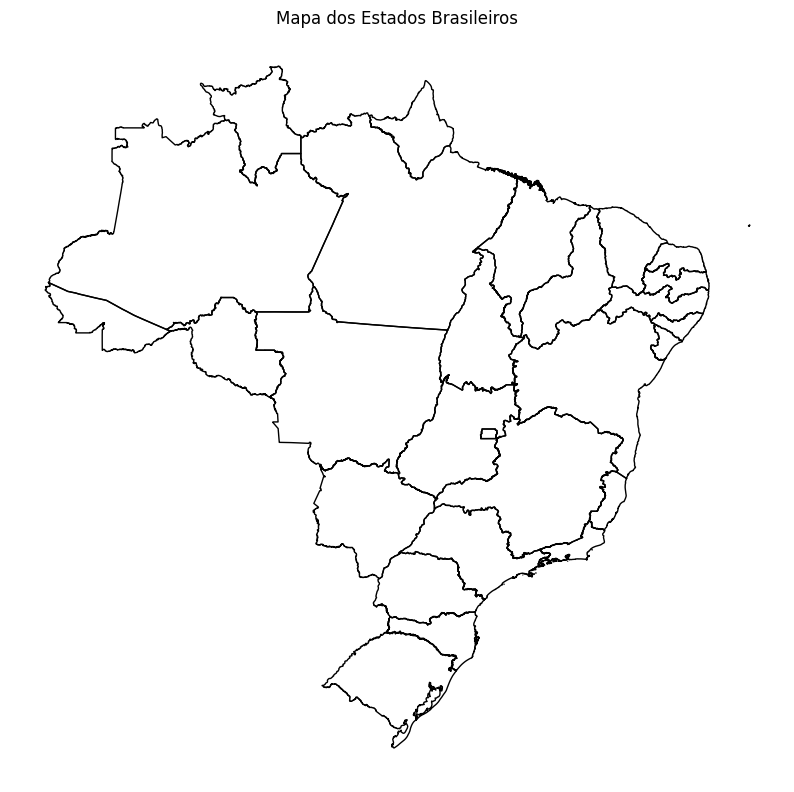

In [154]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Criando o dicionário de siglas
siglas = {
    'Rondônia': 'RO', 'Acre': 'AC', 'Amazonas': 'AM', 'Roraima': 'RR', 'Pará': 'PA', 'Amapá': 'AP',
    'Tocantins': 'TO', 'Maranhão': 'MA', 'Piauí': 'PI', 'Ceará': 'CE', 'Rio Grande do Norte': 'RN',
    'Paraíba': 'PB', 'Pernambuco': 'PE', 'Alagoas': 'AL', 'Sergipe': 'SE', 'Bahia': 'BA',
    'Minas Gerais': 'MG', 'Espírito Santo': 'ES', 'Rio de Janeiro': 'RJ', 'São Paulo': 'SP',
    'Paraná': 'PR', 'Santa Catarina': 'SC', 'Rio Grande do Sul': 'RS',
    'Mato Grosso do Sul': 'MS', 'Mato Grosso': 'MT', 'Goiás': 'GO', 'Distrito Federal': 'DF'
}

# Adicionando a coluna 'sigla' ao DataFrame
df['sigla'] = df['UF'].map(siglas)

# Carregando os dados geográficos dos estados brasileiros
geojson_url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
gdf_states = gpd.read_file(geojson_url)

# Plotando o mapa
fig, ax = plt.subplots(figsize=(10, 10))
gdf_states.boundary.plot(ax=ax, linewidth=1, color='k')
plt.title('Mapa dos Estados Brasileiros')
plt.axis('off')
plt.show()